<a href="https://colab.research.google.com/github/shivamrrbacc/Data-Science-Projects/blob/main/Crime_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Crime Data

**Data Exploration**

In [27]:
import pandas as pd

In [28]:
crime = pd.read_csv("/content/crime_data.csv")

In [29]:
crime.head()

,DR_NO,Date_Rptd,DATE_OCC,AREA_NAME,Crm_Cd,Crm_Cd_Desc,Vict_Age,Vict_Sex,Premis_Desc,Status,Location,LAT,LON
0,10304468,01-08-2020,01-08-2020,Southwest,624,BATTERY - SIMPLE ASSAULT,36,F,SINGLE FAMILY DWELLING,AO,1100 W 39TH PL,34.01,-118.30
1,190101086,01-02-2020,01-01-2020,Central,624,BATTERY - SIMPLE ASSAULT,25,M,SIDEWALK,IC,700 S HILL ST,34.05,-118.25
2,191501505,01-01-2020,01-01-2020,N Hollywood,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),76,F,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",IC,5400 CORTEEN PL,34.17,-118.40
3,191921269,01-01-2020,01-01-2020,Mission,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",31,X,BEAUTY SUPPLY STORE,IC,14400 TITUS ST,34.22,-118.45
4,200100502,01-02-2020,01-02-2020,Central,442,SHOPLIFTING - PETTY THEFT ($950 & UNDER),23,M,DEPARTMENT STORE,IC,700 S FIGUEROA ST,34.05,-118.26


In [30]:
crime.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DR_NO        499 non-null    int64  
 1   Date_Rptd    499 non-null    object 
 2   DATE_OCC     499 non-null    object 
 3   AREA_NAME    499 non-null    object 
 4   Crm_Cd       499 non-null    int64  
 5   Crm_Cd_Desc  499 non-null    object 
 6   Vict_Age     499 non-null    int64  
 7   Vict_Sex     472 non-null    object 
 8   Premis_Desc  499 non-null    object 
 9   Status       499 non-null    object 
 10  Location     499 non-null    object 
 11  LAT          499 non-null    float64
 12  LON          499 non-null    float64
dtypes: float64(2), int64(3), object(8)
memory usage: 50.8+ KB


In [31]:
crime.describe()

,DR_NO,Crm_Cd,Vict_Age,LAT,LON
count,4.990000e+02,499.000000,499.000000,499.000000,499.000000
mean,1.999930e+08,504.178357,32.142285,34.047335,-118.261283
std,8.742243e+06,198.381863,20.202136,0.053840,0.041560
min,1.030447e+07,210.000000,0.000000,33.710000,-118.560000
25%,2.001044e+08,330.000000,23.000000,34.040000,-118.260000
50%,2.001048e+08,442.000000,31.000000,34.050000,-118.250000
75%,2.001064e+08,624.000000,46.500000,34.050000,-118.240000
max,2.220130e+08,956.000000,78.000000,34.280000,-118.190000


In [32]:
crime.shape

(499, 13)

#Data Analysis and Data Visualizations

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

**Temporal Analysis:**

   - Analyze the temporal aspects of the data.

   - Determine trends in crime occurrence over time

In [66]:
year = pd.to_datetime(crime['Date_Rptd'])
Y = year.dt.year
a = Y.unique()
a


array([2020, 2021, 2022], dtype=int32)

In [62]:
b = Y.value_counts().unique()
b


array([491,   6,   2])

In [70]:
df_ab = pd.DataFrame({
    'Unique Years': a,
    'Crime Counts': b
})
df_ab

,Unique Years,Crime Counts
0,2020,491
1,2021,6
2,2022,2


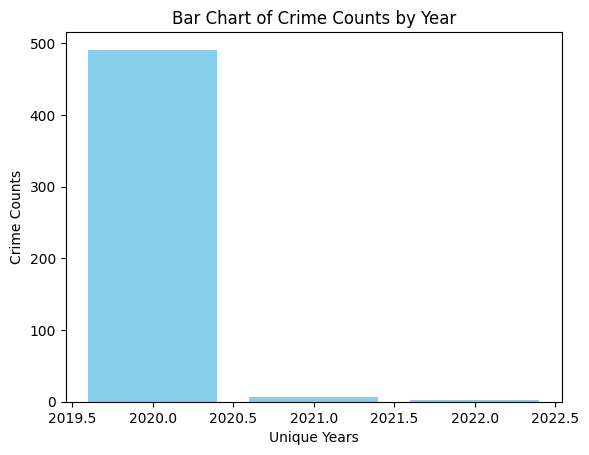

In [76]:
import matplotlib.pyplot as plt

# Data
unique_years = [2020, 2021, 2022]
crime_counts = [491, 6, 2]

# Create bar chart
plt.bar(unique_years, crime_counts, color='skyblue')

# Add labels and title
plt.xlabel('Unique Years')
plt.ylabel('Crime Counts')
plt.title('Bar Chart of Crime Counts by Year')

# Show plot
plt.show()


**Spatial Analysis:**

   - Utilize the geographical information (Latitude and Longitude) to perform spatial analysis.

   - Visualize crime hotspots on a map.

   - Where are the geographical hotspots located as per latitude and longitude


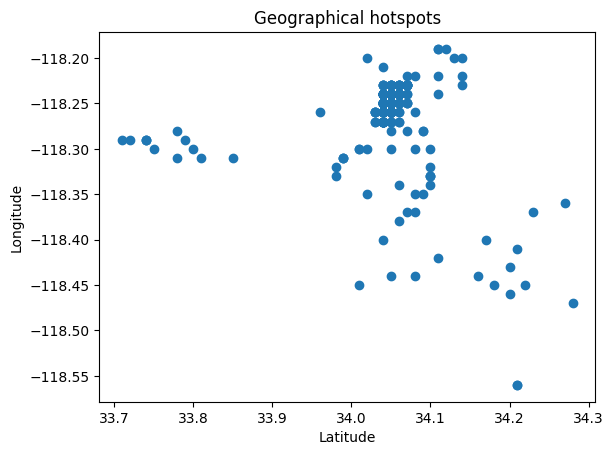

<Figure size 300x300 with 0 Axes>

In [34]:
plt.scatter(crime.LAT,crime.LON)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("Geographical hotspots")
plt.figure(figsize=(3,3))
plt.show()

**Victim Demographics:**

   - Investigate the distribution of victim ages and genders.

   - Identify common premises descriptions where crimes occur.

   - What is the distribution of victim ages in reported crimes?

   - Is there a significant difference in crime rates between male and female victims?



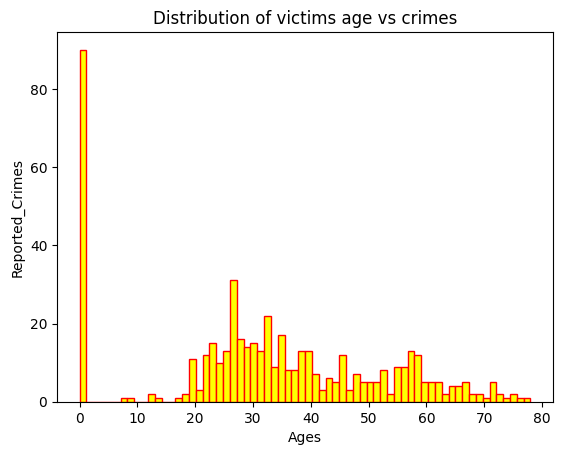

<Figure size 300x300 with 0 Axes>

In [79]:
plt.hist(crime.Vict_Age,color="Yellow",edgecolor="red",bins=66)
plt.xlabel("Ages")
plt.ylabel("Reported_Crimes")
plt.title("Distribution of victims age vs crimes")
plt.figure(figsize=(3,3))
plt.show()


In [140]:
a = crime['Vict_Sex'].value_counts().unique()
a


array([278, 155,  39])

In [151]:
b = crime['Vict_Sex'].unique()
b



array(['F', 'M', 'X', nan], dtype=object)

In [156]:
df_Gender = pd.DataFrame({"Gender": ['F', 'M', 'X'],
                          "Counts": [278, 155,  39]})
df_Gender

,Gender,Counts
0,F,278
1,M,155
2,X,39


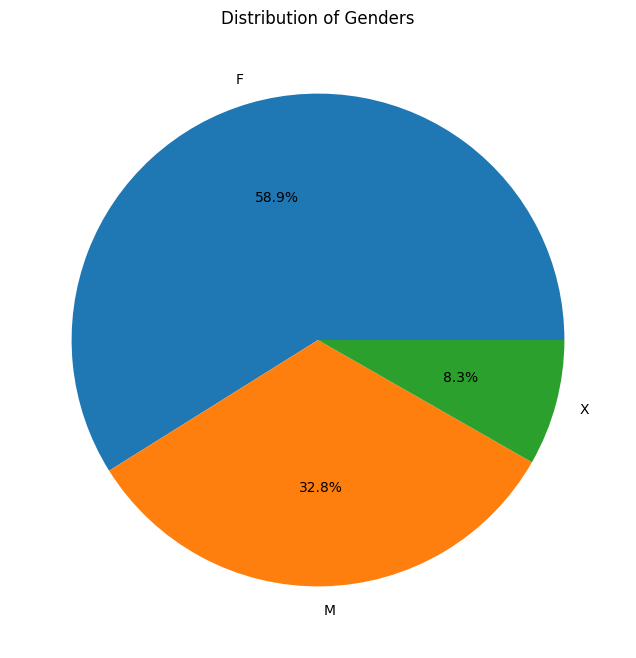

In [158]:
import matplotlib.pyplot as plt

# Data
genders = ['F', 'M', 'X']
counts = [278, 155, 39]

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=genders, autopct='%1.1f%%')
plt.title('Distribution of Genders')
plt.show()


**Status Analysis:**

   - Examine the status of reported crimes.

   - Classify crimes based on their current status

In [83]:
status_type = crime['Status'].unique()
status_type

array(['AO', 'IC', 'AA', 'JO'], dtype=object)

In [87]:
status_counts = crime['Status'].value_counts().unique()
status_counts

array([447,  27,  24,   1])

In [93]:
df_status = pd.DataFrame({"Status": status_type,
              "Counts": status_counts})
df_status

,Status,Counts
0,AO,447
1,IC,27
2,AA,24
3,JO,1


<ipython-input-99-1d032c7eba30>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Status', y='Counts', data=df_status, palette=custom_palette)


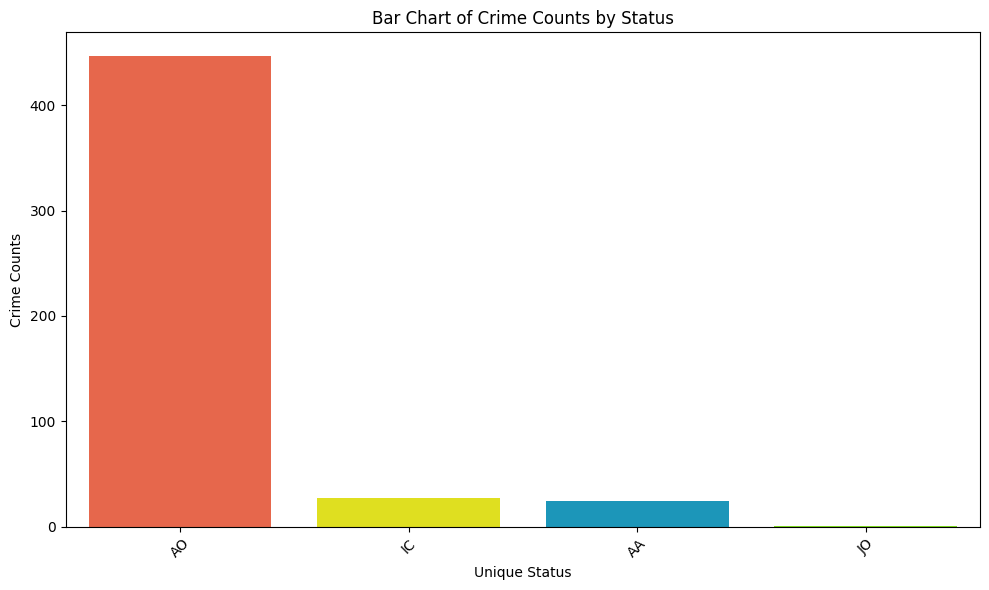

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df_status' is your DataFrame containing 'Status' and 'Counts' columns

# Define a custom color palette
custom_palette = ["#FF5733", "yellow", "#02A4D3", "#7FFF00"]

# Create bar chart using Seaborn with custom palette
plt.figure(figsize=(10, 6))
sns.barplot(x='Status', y='Counts', data=df_status, palette=custom_palette)
plt.xlabel('Unique Status')
plt.ylabel('Crime Counts')
plt.title('Bar Chart of Crime Counts by Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Location Analysis:**

Where do most crimes occur based on the "Location" column?





In [129]:
locations = crime['Location'].unique()
locations

array(['1100 W 39TH PL', '700 S HILL ST', '5400 CORTEEN PL',
       '14400 TITUS ST', '700 S FIGUEROA ST', '200 E 6TH ST',
       '700 BERNARD ST', '800 N ALAMEDA ST', '800 S OLIVE ST',
       '700 W 7TH ST', '100 S LOS ANGELES ST', '13600 LEADWELL ST', '8TH',
       'WALL', '800 N BROADWAY', '400 S SPRING ST', '300 W 5TH ST',
       '1800 S MAIN ST', '600 W 7TH ST', '700 ALPINE ST',
       '6200 SYLMAR AV', '100 E 5TH ST', '1200 E 7TH ST',
       '700 S FLOWER ST', '300 E 3RD ST', '1ST', '1200 S GRAND AV',
       '300 S GRAND AV', '600 S CENTRAL AV', '600 N BROADWAY',
       '800 W 7TH ST', '7TH ST', '23400 PRESIDENT AV', '13100 LAKE ST',
       '100 W 1ST ST', '3RD', '6TH', '1600 S HOPE ST',
       '600 S SAN PEDRO ST', '100 W 2ND ST', '4TH', '700 S GRAND AV',
       '5TH', 'PALMETTO', '800 JAMES M WOOD BL', 'GRAND',
       '200 N AVENUE 25', '500 SAN JULIAN ST', '43RD ST',
       '100 PASEO DE LA PLAZA', '500 S SAN PEDRO ST',
       '1300 S LOS ANGELES ST', '800 S FIGUEROA ST', 'JES

In [130]:
counts = crime['Location'].value_counts().unique()
counts

array([14, 11,  6,  5,  4,  3,  2,  1])

In [132]:
import pandas as pd

# Assuming 'locations' is a list of unique locations and 'location_counts' is their corresponding counts

# Create DataFrame
df_location = pd.DataFrame({
    "Locations": ['1100 W 39TH PL', '700 S HILL ST', '5400 CORTEEN PL', '14400 TITUS ST',
                  '700 S FIGUEROA ST', '200 E 6TH ST', '700 BERNARD ST', '800 N ALAMEDA ST'],
    "counts": [14, 11, 6, 5, 4, 3, 2, 1]
})

print(df_location)


           Locations  counts
0     1100 W 39TH PL      14
1      700 S HILL ST      11
2    5400 CORTEEN PL       6
3     14400 TITUS ST       5
4  700 S FIGUEROA ST       4
5       200 E 6TH ST       3
6     700 BERNARD ST       2
7   800 N ALAMEDA ST       1


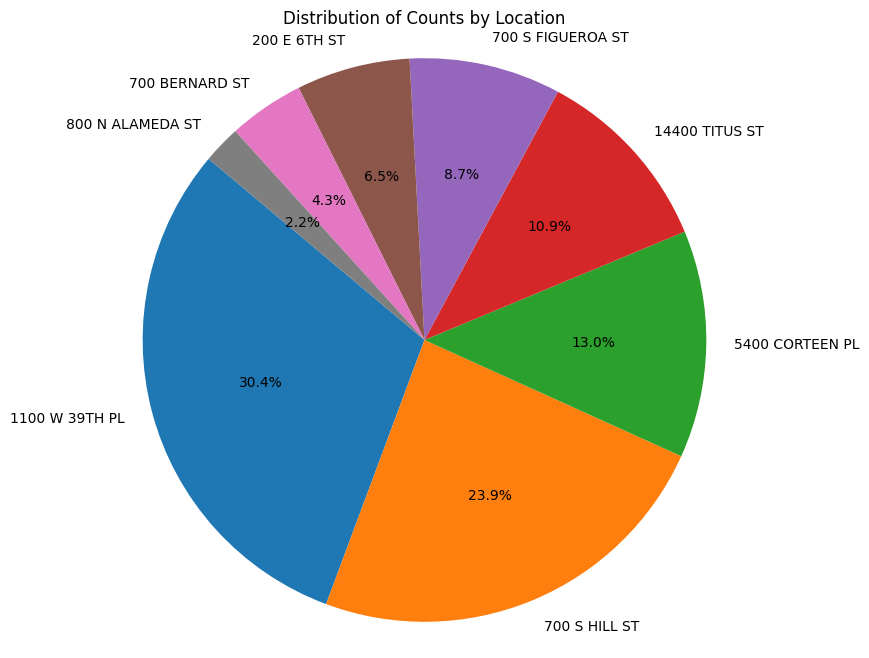

In [133]:
import matplotlib.pyplot as plt

# Data
locations = ['1100 W 39TH PL', '700 S HILL ST', '5400 CORTEEN PL', '14400 TITUS ST',
             '700 S FIGUEROA ST', '200 E 6TH ST', '700 BERNARD ST', '800 N ALAMEDA ST']
counts = [14, 11, 6, 5, 4, 3, 2, 1]

# Create pie plot
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=locations, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Counts by Location')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()


**Crime Code Analysis:**


What is the distribution of reported crimes based on Crime Code?

In [135]:
#where are the geographical hotspots located as per latitude and longitude
import matplotlib.pyplot as plt
import seaborn as sns
crime['Crm_Cd'].unique()

array([624, 745, 740, 442, 946, 341, 330, 930, 648, 354, 230, 761, 350,
       310, 480, 623, 440, 510, 210, 900, 888, 420, 886, 421, 647, 940,
       662, 220, 625, 755, 649, 901, 320, 890, 351, 956, 820, 812, 920,
       850, 666, 343])

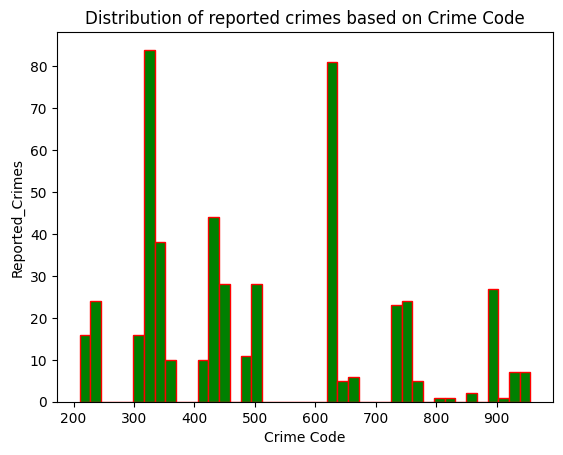

<Figure size 200x200 with 0 Axes>

In [134]:
plt.hist(crime.Crm_Cd,color="Green",edgecolor="red",bins=42)
plt.xlabel("Crime Code")
plt.ylabel("Reported_Crimes")
plt.title("Distribution of reported crimes based on Crime Code")
plt.figure(figsize=(2,2))
plt.show()